In [2]:
import numpy as np
from matplotlib import pylab as plt
import detest
import sympy

In [3]:
%mkdir data

mkdir: data: File exists


In [4]:
Nx = 41
Nt = 100

In [5]:
def plot_stack_and_save(SOLS, xlim, tlim, fname):
    xs = np.linspace(*xlim)
    ts = np.linspace(*tlim)
    grid = np.meshgrid(xs,ts)
    US = []
    for S in SOLS:
        u = S(grid[0],grid[1])
        plt.figure()
        for i,t in enumerate(ts):
            plt.plot(xs,u[i,:],'-+')
        US.append(u)
    UDATA = np.stack(US)
    np.savez(f"data/{fname}",U=UDATA)

# Analytical solutions to burgers' equation

\begin{equation}
\partial_t u + u \partial_x u = 0
\end{equation}

In [6]:
def make_linear(a,b):
    def linear(x,t):
        return (a*x+b)/(a*t+1)
    return linear
def riemann(uL,uR):
    def sol(x,t):
        if uL>=uR:
            S = 0.5*(uL+uR)
            return uL if x<S*t else uR
        else:
            if(x<uL*t): return uL
            if(x>=uR*t): return uR
    
            f = (x/t - uL)/(uR-uL);
            return (1.0-f)*uL + f*(uR)
    return np.vectorize(sol)
@np.vectorize
def parabola(x,t):
    if t==0.0:
        return 1.0-x**2.0
    else:
        return 1.0 - (1.0-np.sqrt(1.0+4.0*t*(t-x)) )**2.0 / (2.0*t)**2.0

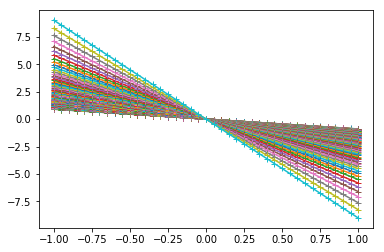

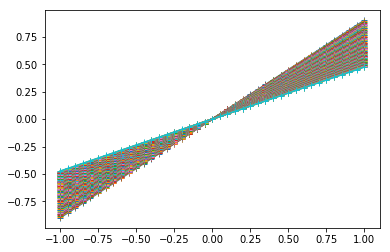

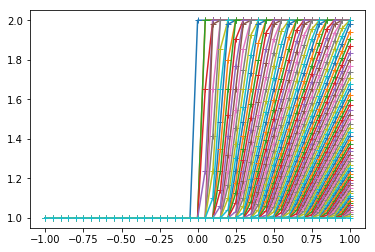

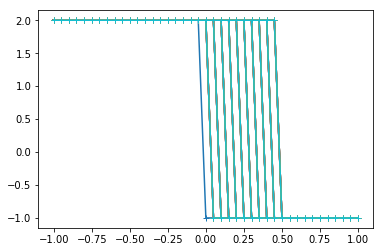

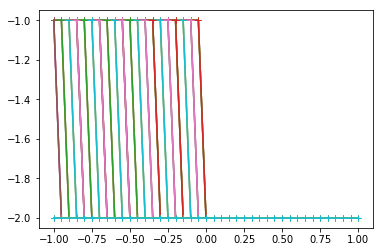

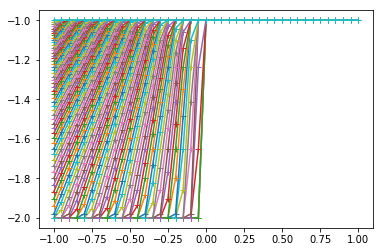

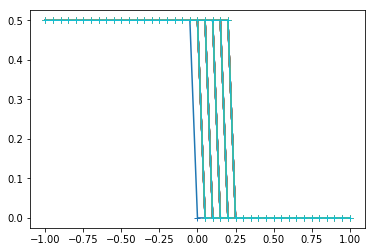

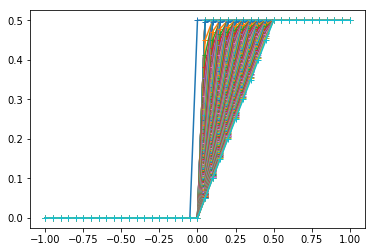

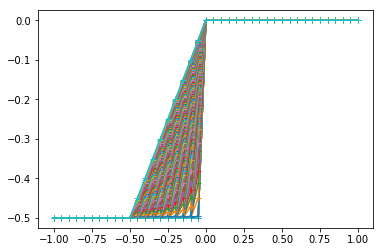

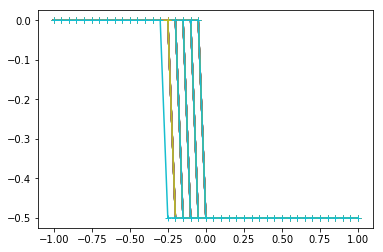

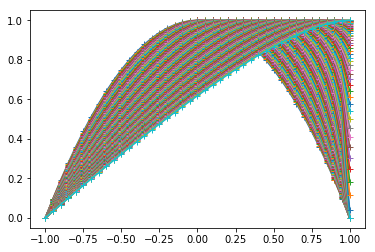

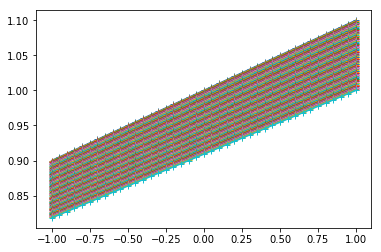

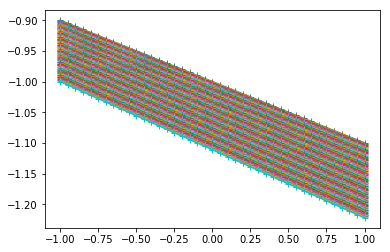

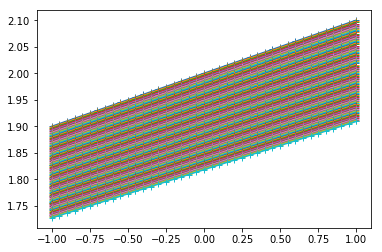

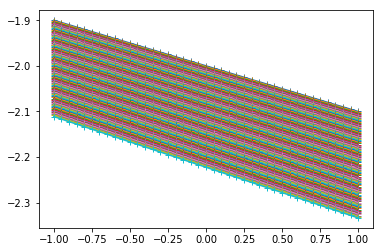

In [10]:
SOLS = [
    make_linear(-0.9,0),
    make_linear(0.9,0),
    riemann(1.0,2.0),
    riemann(2.0,-1.0),
    riemann(-1.0,-2.0),
    riemann(-2.0,-1.0),
    riemann(0.5,0.0),
    riemann(0.0,0.5),
    riemann(-0.5,0.0),
    riemann(0.0,-0.5),
    parabola,
    make_linear(.1,1),
    make_linear(-.1,-1),
    make_linear(.1,2),
    make_linear(-.1,-2),
]
plot_stack_and_save(SOLS, (-1,1,Nx), (0,1,Nt), "burgers")

# The KdV Equation
\begin{equation}
\partial_t u + 6 u \partial_x u + \partial_{xxx}u =  0
\end{equation}

The citation for the analytical solutions is:
>The Korteweg-de Vries Equation: History, exact Solutions, and graphical Representation  
> by Klaus Brauer, University of Osnabrück/Germany1  
> May 2000


In [46]:
sech = lambda x : np.cosh(x)**-1
csch = lambda x : np.sinh(x)**-1
def make_soliton(beta):
    def u(x,t):
        return 0.5*beta*sech(0.5*np.sqrt(beta)*(x-beta*t))**2
    return u
def make_left_soliton(beta):
    def u(x,t):
        return - 0.5*beta*csch(0.5*np.sqrt(beta)*(x-beta*t))**2.0
    return u
def double_soliton(x,t):
    return - 12.0*(
        3.0 + 4.0*np.cosh(2.0*x-8.0*t) + np.cosh(4.0*x-64.0*t)
    ) / (
        3.0*np.cosh(x-28.0*t) + np.cosh(3.0*x-36*t)
    )**2

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in reciprocal
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in sinh
  


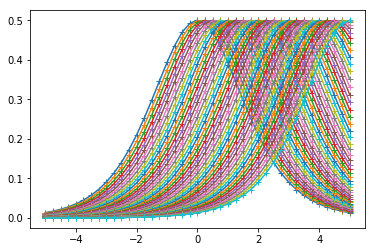

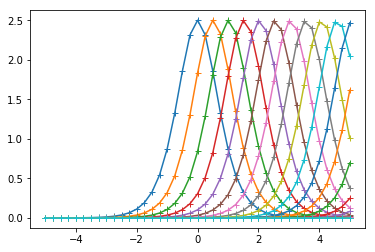

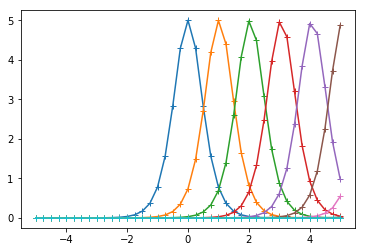

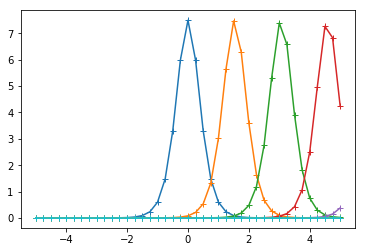

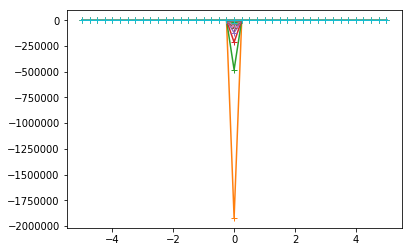

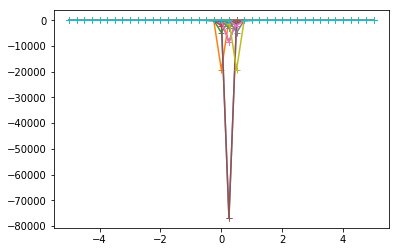

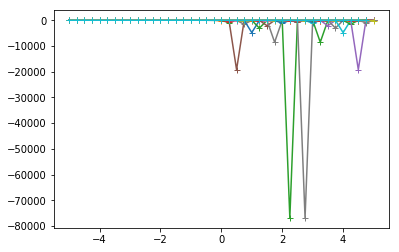

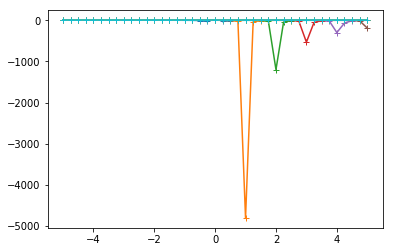

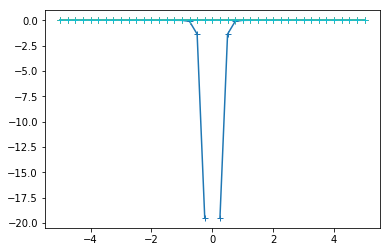

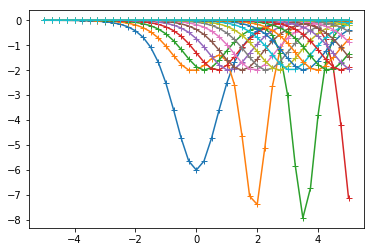

In [59]:
SOLS = [
    make_soliton(1.0),
    make_soliton(5.0),
    make_soliton(10.0),
    make_soliton(15.0),
    make_left_soliton(1.0),
    make_left_soliton(5.0),
    make_left_soliton(10.0),
    make_left_soliton(15.0),
    double_soliton
]
plot_stack_and_save(SOLS,(-5,5,Nx),(0,5.0,Nt),"KdV")

# The heat equation

[0.5160245509311918, 2.7755575615628914e-17, 0.019112020404858942, 1.214306433183765e-17, 0.004128196407449524, 8.239936510889834e-18, 0.0015044447549014271, 6.179952383167375e-18, 0.0007078526075873633, 4.9873299934333204e-18, 0.0003876968827431781, 4.1470733097570545e-18, 0.000234876900742468, 3.550762114890027e-18, 0.00015289616323886196, 3.1035287187397564e-18, 0.0001050324752556894, 2.757939276260002e-18, 7.523320468452348e-05, 2.4801124695605914e-18]
[0.19350920659919693, -0.024188650824899606, 0.007167007651822101, -0.0030235813531124464, 0.0015480736527935708, -0.0008958759564777596, 0.0005641667830880341, -0.00037794766913905347, 0.00026544472784526056, -0.00019350920659919448, 0.00014538633102868976, -0.00011198449455971839, 8.807883777842609e-05, -7.052084788600294e-05, 5.733606121457203e-05, -4.724345864238052e-05, 3.9387178220883785e-05, -3.318059098065654e-05, 2.8212451756695488e-05, -2.418865082489838e-05]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


[array(-2.59878122e-17), array(0.5), array(4.6778062e-17), array(-2.59878122e-17), array(1.8562723e-17), array(-1.46181444e-17), array(1.21276457e-17), array(-1.03951249e-17), array(9.11260948e-18), array(-8.12119132e-18), array(2.66609024e-17), array(-6.68258028e-18), array(-7.56486725e-18), array(-5.68483392e-18), array(1.55256983e-17), array(-4.95005947e-18), array(-3.28543632e-18), array(-4.38544331e-18), array(1.04846865e-17), array(-3.93754731e-18)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


[array(-1.03951249e-17), array(2.59878122e-17), array(-6.68258028e-17), array(0.5), array(8.66260407e-17), array(-4.6778062e-17), array(3.30753974e-17), array(-2.59878122e-17), array(2.15898748e-17), array(-1.8562723e-17), array(5.94157253e-17), array(-1.46181444e-17), array(-1.63163804e-17), array(-1.21276457e-17), array(3.28342519e-17), array(-1.03951249e-17), array(-6.8597022e-18), array(-9.11260948e-18), array(2.16987424e-17), array(-8.12119132e-18)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


[array(4.22301949e-18), array(-2.07902498e-17), array(0.5), array(0.5), array(5.00806798e-17), array(-2.07902498e-17), array(1.26099952e-17), array(-8.97760786e-18), array(6.97173039e-18), array(-5.71160708e-18), array(1.76390434e-17), array(-4.22301949e-18), array(-4.61447632e-18), array(-3.37239346e-18), array(9.00661771e-18), array(-2.81973023e-18), array(-1.84354497e-18), array(-2.43002919e-18), array(5.74831742e-18), array(-2.13934196e-18)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


[array(-3.63829371e-17), array(0.5), array(-2.00477409e-17), array(0.5), array(1.05188764e-16), array(-6.13962064e-17), array(4.52030431e-17), array(-3.63829371e-17), array(3.07024842e-17), array(-2.66839143e-17), array(8.60766276e-17), array(-2.13007247e-17), array(-2.38812476e-17), array(-1.78124796e-17), array(4.83599502e-17), array(-1.53451844e-17), array(-1.01451385e-17), array(-1.34980528e-17), array(3.21834289e-17), array(-1.20587386e-17)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


[array(-3.09378717e-17), array(0.5), array(2.97678576e-17), array(0.), array(-2.14185266e-17), array(5.22076585e-17), array(-1.33404103e-16), array(0.5), array(1.74211652e-16), array(-9.4747232e-17), array(2.45560943e-16), array(-5.34606423e-17), array(-5.51154614e-17), array(-3.87602313e-17), array(1.0077239e-16), array(-3.09378717e-17), array(-1.9931647e-17), array(-2.59753181e-17), array(6.08959063e-17), array(-2.25002703e-17)]
[1.2900613773279797, 5.551115123125783e-17, 0.047780051012147357, 3.122502256758253e-17, 0.010320491018623812, 2.0816681711721685e-17, 0.003761111887253567, 1.5612511283791264e-17, 0.0017696315189684084, 1.235990476633475e-17, 0.0009692422068579452, 1.0354130747236567e-17, 0.0005871922518561701, 8.863352760068999e-18, 0.00038224040809715486, 7.752045533271357e-18, 0.0002625811881392235, 6.898236322439022e-18, 0.00018808301171130873, 6.207057437479513e-18]
[-1.9350920659919695, -9.71445146547012e-17, -0.07167007651822102, -4.683753385137379e-17, -0.01548073652

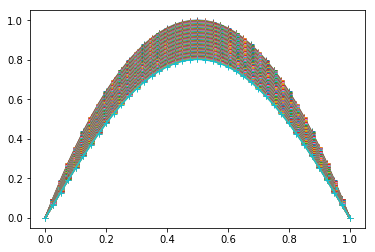

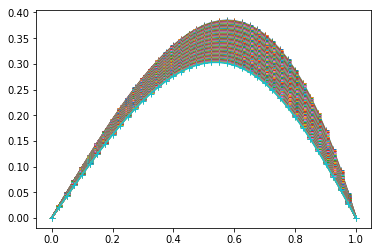

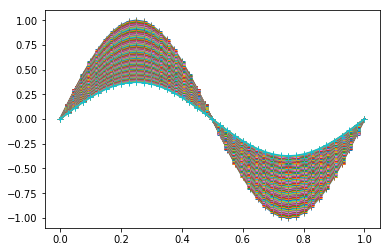

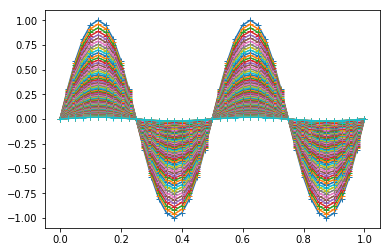

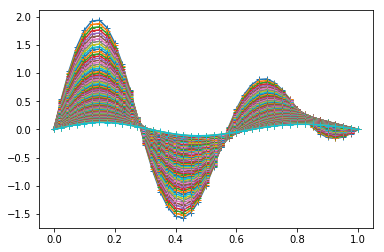

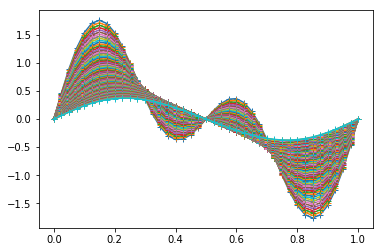

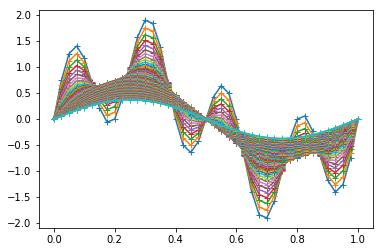

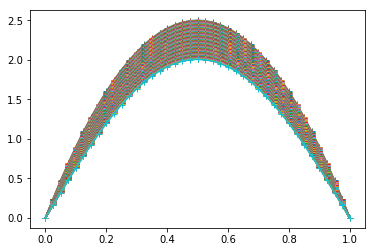

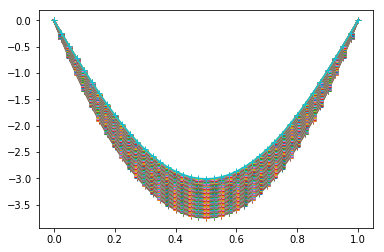

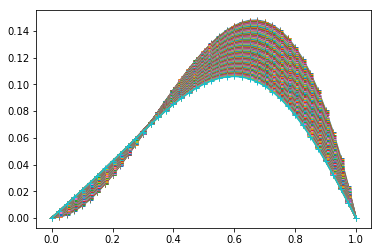

In [9]:
PAR = [
    {'k':0.1,},
    {'k':0.1,'u0':lambda x: -x**3+x},
    {'k':0.1,'u0':lambda x: sympy.sin(2.0*x*sympy.pi)},
    {'k':0.1,'u0':lambda x: sympy.sin(4.0*x*sympy.pi)},
    {'k':0.1,'u0':lambda x: sympy.sin(3.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'k':0.1,'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'k':0.1,'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(8.0*x*sympy.pi)},
    {'k':0.1,'u0':lambda x: 10.0*(x-x**2)},
    {'k':0.1,'u0':lambda x: 15.0*(-x+x**2)},
    {'k':0.1,'u0':lambda x: -x**3+x**2},
]
def wrap(f):
    def u(x,t):
        xt = np.c_[x.ravel(),t.ravel()]
        F = f(xt)
        return F['u'].reshape(x.shape)
    return u
SOLS = [ wrap(detest.oracles.HeatEquation1D(P)) for P in PAR ]
plot_stack_and_save(SOLS,(0,1,Nx),(0,0.25,Nt),"heat")

# The wave equation

[0.5160245509311918, 2.7755575615628914e-17, 0.019112020404858942, 1.214306433183765e-17, 0.004128196407449524, 8.239936510889834e-18, 0.0015044447549014271, 6.179952383167375e-18, 0.0007078526075873633, 4.9873299934333204e-18, 0.0003876968827431781, 4.1470733097570545e-18, 0.000234876900742468, 3.550762114890027e-18, 0.00015289616323886196, 3.1035287187397564e-18, 0.0001050324752556894, 2.757939276260002e-18, 7.523320468452348e-05, 2.4801124695605914e-18]
[0.19350920659919693, -0.024188650824899606, 0.007167007651822101, -0.0030235813531124464, 0.0015480736527935708, -0.0008958759564777596, 0.0005641667830880341, -0.00037794766913905347, 0.00026544472784526056, -0.00019350920659919448, 0.00014538633102868976, -0.00011198449455971839, 8.807883777842609e-05, -7.052084788600294e-05, 5.733606121457203e-05, -4.724345864238052e-05, 3.9387178220883785e-05, -3.318059098065654e-05, 2.8212451756695488e-05, -2.418865082489838e-05]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


[array(-2.59878122e-17), array(0.5), array(4.6778062e-17), array(-2.59878122e-17), array(1.8562723e-17), array(-1.46181444e-17), array(1.21276457e-17), array(-1.03951249e-17), array(9.11260948e-18), array(-8.12119132e-18), array(2.66609024e-17), array(-6.68258028e-18), array(-7.56486725e-18), array(-5.68483392e-18), array(1.55256983e-17), array(-4.95005947e-18), array(-3.28543632e-18), array(-4.38544331e-18), array(1.04846865e-17), array(-3.93754731e-18)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


[array(-1.03951249e-17), array(2.59878122e-17), array(-6.68258028e-17), array(0.5), array(8.66260407e-17), array(-4.6778062e-17), array(3.30753974e-17), array(-2.59878122e-17), array(2.15898748e-17), array(-1.8562723e-17), array(5.94157253e-17), array(-1.46181444e-17), array(-1.63163804e-17), array(-1.21276457e-17), array(3.28342519e-17), array(-1.03951249e-17), array(-6.8597022e-18), array(-9.11260948e-18), array(2.16987424e-17), array(-8.12119132e-18)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars


[array(4.22301949e-18), array(-2.07902498e-17), array(0.5), array(0.5), array(5.00806798e-17), array(-2.07902498e-17), array(1.26099952e-17), array(-8.97760786e-18), array(6.97173039e-18), array(-5.71160708e-18), array(1.76390434e-17), array(-4.22301949e-18), array(-4.61447632e-18), array(-3.37239346e-18), array(9.00661771e-18), array(-2.81973023e-18), array(-1.84354497e-18), array(-2.43002919e-18), array(5.74831742e-18), array(-2.13934196e-18)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


[array(-3.63829371e-17), array(0.5), array(-2.00477409e-17), array(0.5), array(1.05188764e-16), array(-6.13962064e-17), array(4.52030431e-17), array(-3.63829371e-17), array(3.07024842e-17), array(-2.66839143e-17), array(8.60766276e-17), array(-2.13007247e-17), array(-2.38812476e-17), array(-1.78124796e-17), array(4.83599502e-17), array(-1.53451844e-17), array(-1.01451385e-17), array(-1.34980528e-17), array(3.21834289e-17), array(-1.20587386e-17)]


<string>:2: RuntimeWarning: divide by zero encountered in double_scalars
<string>:2: RuntimeWarning: invalid value encountered in double_scalars


[array(-3.09378717e-17), array(0.5), array(2.97678576e-17), array(0.), array(-2.14185266e-17), array(5.22076585e-17), array(-1.33404103e-16), array(0.5), array(1.74211652e-16), array(-9.4747232e-17), array(2.45560943e-16), array(-5.34606423e-17), array(-5.51154614e-17), array(-3.87602313e-17), array(1.0077239e-16), array(-3.09378717e-17), array(-1.9931647e-17), array(-2.59753181e-17), array(6.08959063e-17), array(-2.25002703e-17)]
[1.2900613773279797, 5.551115123125783e-17, 0.047780051012147357, 3.122502256758253e-17, 0.010320491018623812, 2.0816681711721685e-17, 0.003761111887253567, 1.5612511283791264e-17, 0.0017696315189684084, 1.235990476633475e-17, 0.0009692422068579452, 1.0354130747236567e-17, 0.0005871922518561701, 8.863352760068999e-18, 0.00038224040809715486, 7.752045533271357e-18, 0.0002625811881392235, 6.898236322439022e-18, 0.00018808301171130873, 6.207057437479513e-18]
[-1.9350920659919695, -9.71445146547012e-17, -0.07167007651822102, -4.683753385137379e-17, -0.01548073652

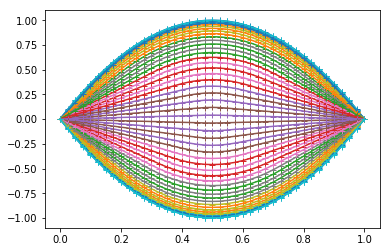

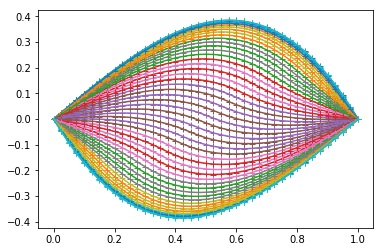

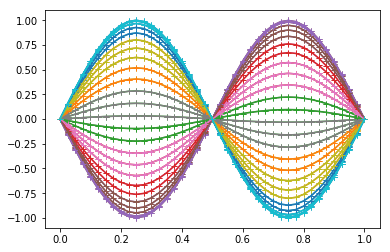

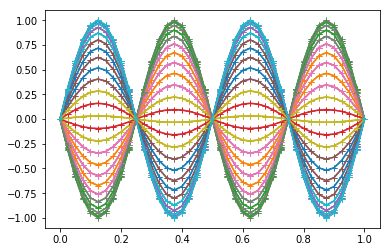

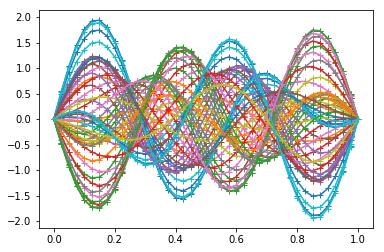

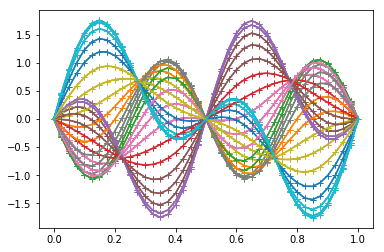

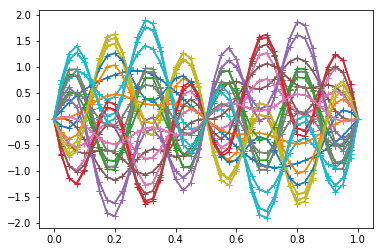

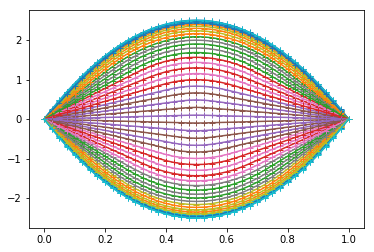

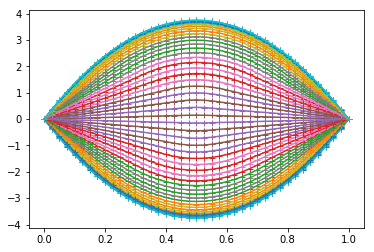

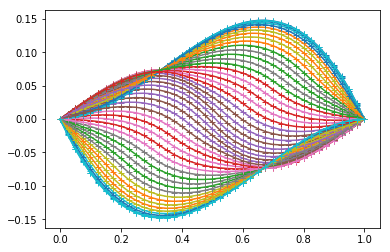

In [60]:
PAR = [
    {},
    {'u0':lambda x: -x**3+x},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(3.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(8.0*x*sympy.pi)},
    {'u0':lambda x: 10.0*(x-x**2)},
    {'u0':lambda x: 15.0*(-x+x**2)},
    {'u0':lambda x: -x**3+x**2},
]

SOLS = [ wrap(detest.oracles.WaveEquation1D(P)) for P in PAR ]
plot_stack_and_save(SOLS,(0,1,Nx),(0,5.0,Nt),"wave")

# The Poisson Equation

In [ ]:
PAR = [
    {'u0':lambda x: -x**3+x},
    {'u0':lambda x: sympy.sin(2.0*x*sympy.pi)+sympy.sin(4.0*x*sympy.pi)},
    {'u0':lambda x: 100.0*(x-x**2)},
    {},
]
xs = np.linspace(0,1,21)
ts = np.linspace(0,1.0,10)
grid = np.meshgrid(xs,ts)
SOLS = [ wrap(detest.oracles.WaveEquation1D(P)) for P in PAR ]
plot_stack_and_save(SOLS)